In [153]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [154]:
match_day = pd.read_csv('../../data/trips_reports/my_report_matchday(20-4).csv')

In [155]:
region_map = gpd.read_file('../../data/RIO DE JANEIRO MAPS/final_map/final_map2.geojson')

In [156]:
pd.set_option('display.max_rows', 500)

# Normalizing Trips Document

In [157]:
#Function to normalize the "total_trips" column
def normalize(df):
    for key, value in df["total_trips"].iteritems():
        if value == '<10':
            df.at[key, 'total_trips'] = '5'
    
    df['total_trips'] = df['total_trips'].astype(float)
    print(df['total_trips'].sum())

In [158]:
normalize(match_day)

585672.79


C:\Users\gabri\AppData\Local\Temp\ipykernel_13244\2208422259.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in df["total_trips"].iteritems():


# Fixing the Data

In [159]:
#merging match_day with region_map
match_region = pd.merge(region_map, match_day, how='left', left_on=['ID'], right_on=['origin_id'])

In [160]:
#removing stadium as a origin rows
match_region = match_region[:183]

In [161]:
#removing trips inside stadium area
match_region.at[182, 'total_trips'] = 0

In [162]:
#filling the NaN spaces 
match_region.fillna(0, inplace=True)

In [163]:
match_region.head(5)

,ID,name,poly_type,geometry,origin_id,destination_id,total_trips
0,0,BELFORD ROXO,periphery,"POLYGON ((-43.37030 -22.69426, -43.37009 -22.6...",0.0,182.0,2733.67
1,1,CACHOEIRAS DE MACACU,periphery,"POLYGON ((-42.79038 -22.37813, -42.78943 -22.3...",1.0,182.0,20.38
2,2,DUQUE DE CAXIAS,periphery,"POLYGON ((-43.41519 -22.60109, -43.41566 -22.6...",2.0,182.0,9404.40
3,3,GUAPIMIRIM,periphery,"POLYGON ((-42.95809 -22.46615, -42.95703 -22.4...",3.0,182.0,142.31
4,4,ITABORAÍ,periphery,"POLYGON ((-42.94340 -22.70671, -42.94301 -22.7...",4.0,182.0,613.65


<AxesSubplot: >

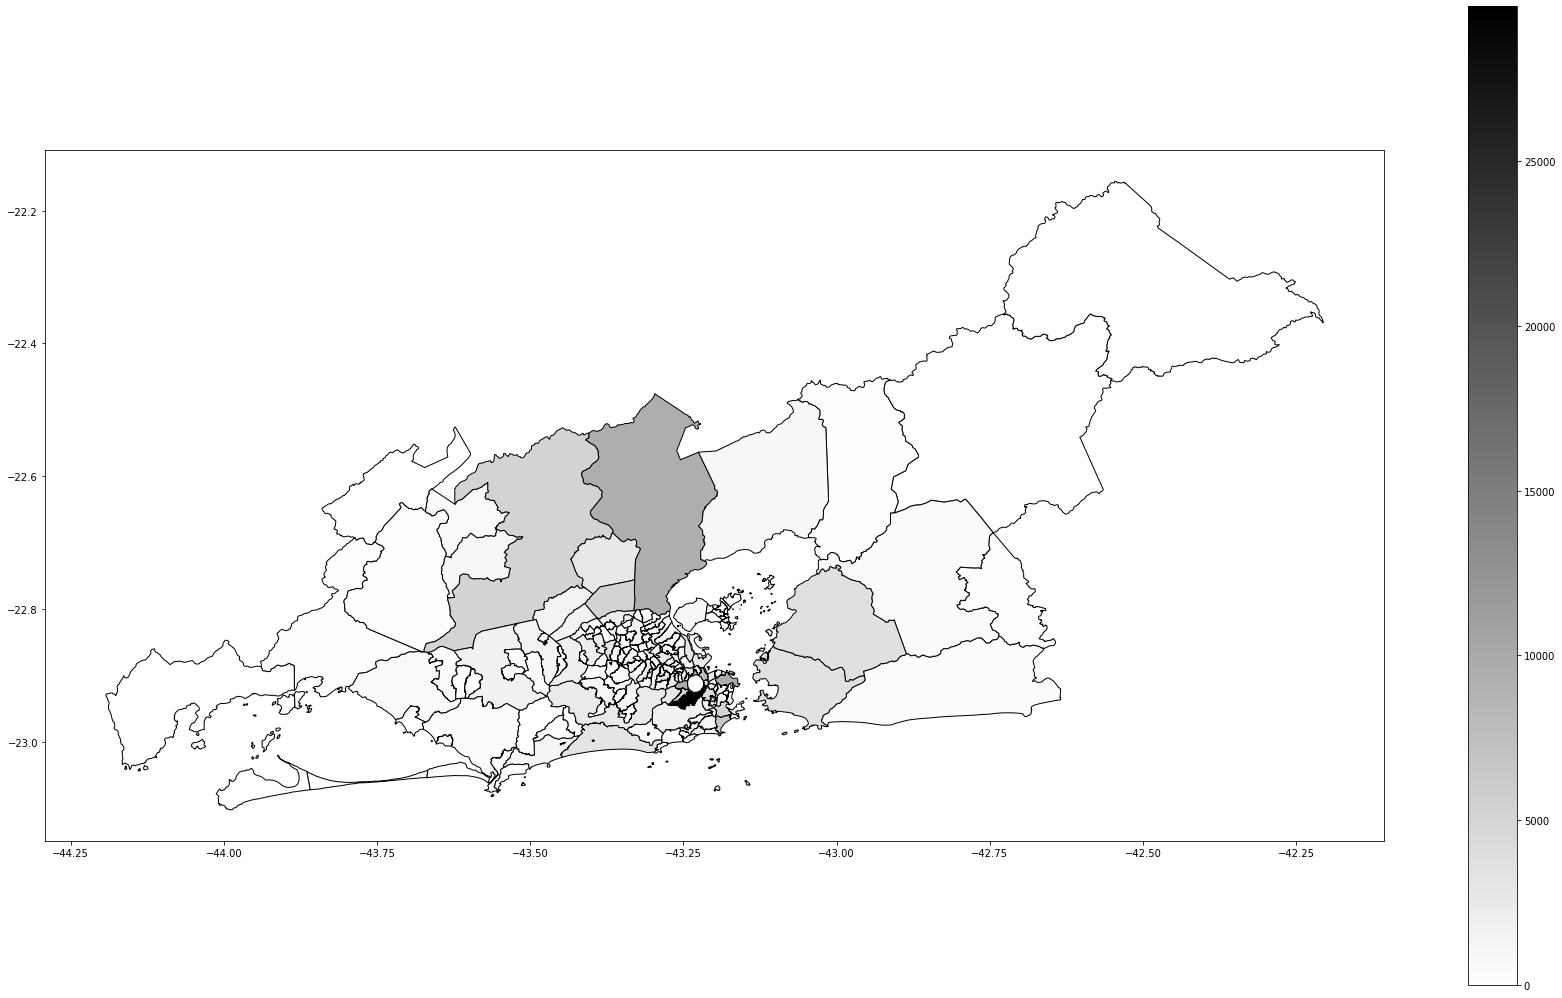

In [164]:
fig, ax = plt.subplots(figsize=(30, 18), subplot_kw=dict(aspect='equal')) #figure layout
match_region.plot(column='total_trips', k=5, legend=True, ax=ax, cmap='binary', edgecolor='black')

In [165]:
x = match_region.centroid.x.iloc[0]
y = match_region.centroid.y.iloc[0]

C:\Users\gabri\AppData\Local\Temp\ipykernel_13244\282898261.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x = match_region.centroid.x.iloc[0]
C:\Users\gabri\AppData\Local\Temp\ipykernel_13244\282898261.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y = match_region.centroid.y.iloc[0]


In [184]:
type(match_region)

geopandas.geodataframe.GeoDataFrame

In [190]:
match_region.to_file('../../data/trips_reports/tests/file.geojson', driver='GeoJSON')

In [192]:
geojson = gpd.read_file('../../data/RIO DE JANEIRO MAPS/final_map/final_map2.geojson')

In [193]:
type(geojson)

geopandas.geodataframe.GeoDataFrame

In [198]:
m = folium.Map(location=[y,x], zoom_start=11)

folium.Choropleth(
    geo_data=geojson,
    data=match_day,
    columns=['total_trips'],
    #key_on='feature.name',
    fill_opacity=0.5,
    line_opacity=1,
    fill_color="YlGn",
).add_to(m)

IndexError: list index out of range

In [195]:
geojson

,ID,name,poly_type,geometry
0,0,BELFORD ROXO,periphery,"POLYGON ((-43.37030 -22.69426, -43.37009 -22.6..."
1,1,CACHOEIRAS DE MACACU,periphery,"POLYGON ((-42.79038 -22.37813, -42.78943 -22.3..."
2,2,DUQUE DE CAXIAS,periphery,"POLYGON ((-43.41519 -22.60109, -43.41566 -22.6..."
3,3,GUAPIMIRIM,periphery,"POLYGON ((-42.95809 -22.46615, -42.95703 -22.4..."
4,4,ITABORAÍ,periphery,"POLYGON ((-42.94340 -22.70671, -42.94301 -22.7..."
5,5,ITAGUAÍ,periphery,"MULTIPOLYGON (((-43.85908 -23.07222, -43.86467..."
6,6,JAPERI,periphery,"POLYGON ((-43.62271 -22.64223, -43.62222 -22.6..."
7,7,MAGÉ,periphery,"POLYGON ((-43.10784 -22.53348, -43.10730 -22.5..."
8,8,MANGARATIBA,periphery,"MULTIPOLYGON (((-43.98886 -23.10241, -43.98936..."
9,9,MARICÁ,periphery,"POLYGON ((-42.75662 -22.85058, -42.75590 -22.8..."
